In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import shap

# Load data
payment_data = pd.read_csv('payment_data.csv')
customer_data = pd.read_csv('customer_data.csv')

# Explore Data
# ... (Explore data as described in the previous response)

# Build Features
# ... (Feature engineering as described in the previous response)

# Merge data
merged_data = pd.merge(payment_data, customer_data, on='id', how='inner')

# Data Preprocessing
# Encode categorical features
label_encoder = LabelEncoder()
merged_data['encoded_prod_code'] = label_encoder.fit_transform(merged_data['prod_code'])

# Define features and target
features = ['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'encoded_prod_code', 'prod_limit', 'new_balance', 'highest_balance']
target = 'label'  # Replace with the actual target column name

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(merged_data[features], merged_data[target], test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))

# Model Interpretability (using SHAP)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test, feature_names=features)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [2]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/69/17/805f875ba4c906c13e763d23387ec709bd9ff4d00e2e876f7bc1e31d9fb5/shap-0.43.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 7.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X_train and y_train are your training data and labels
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Split the data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_imputed, y_train, test_size=0.2, random_state=42
)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Model Evaluation
y_pred = model.predict(X_test_split)
print(classification_report(y_test_split, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1079
           1       0.35      0.10      0.16       241

    accuracy                           0.80      1320
   macro avg       0.59      0.53      0.52      1320
weighted avg       0.74      0.80      0.75      1320



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
payment_data = pd.read_csv('payment_data.csv')
customer_data = pd.read_csv('customer_data.csv')

# Display basic information about the datasets
print("Payment Data:")
print(payment_data.info())

print("\nCustomer Data:")
print(customer_data.info())

# Summary statistics
print("\nPayment Data Summary Statistics:")
print(payment_data.describe())

# Explore target variable distribution
sns.countplot(x='label', data=payment_data)
plt.title('Distribution of High and Low Credit Risk')
plt.show()

# Correlation matrix for numerical features
correlation_matrix = payment_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of numerical features
payment_data.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

# Explore relationships between features
sns.pairplot(payment_data, hue='label', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Credit Risk', y=1.02, fontsize='large')
plt.show()

# Explore categorical features
for feature in ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']:
    sns.countplot(x=feature, data=customer_data, hue='label')
    plt.title(f'Distribution of {feature} by Credit Risk')
    plt.show()


Payment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB
None

Customer Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  -

ValueError: Could not interpret input 'label'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
payment_data = pd.read_csv('payment_data.csv')
customer_data = pd.read_csv('customer_data.csv')

# Display basic information about the datasets
print("Payment Data:")
print(payment_data.info())

print("\nCustomer Data:")
print(customer_data.info())

# Display summary statistics
print("\nSummary Statistics - Payment Data:")
print(payment_data.describe())

print("\nSummary Statistics - Customer Data:")
print(customer_data.describe())

# Explore target variable distribution
target_variable = 'label'  # Replace with the actual name of your target variable column
sns.countplot(x=target_variable, data=payment_data)
plt.title('Distribution of High and Low Credit Risk')
plt.show()

# Explore relationships between features
# For example, you can use a pairplot to visualize relationships between numerical features
sns.pairplot(payment_data, hue=target_variable)
plt.suptitle('Pairplot of Numerical Features by Credit Risk', y=1.02)
plt.show()

# You can also explore relationships between categorical features and the target variable
# For example, using a bar plot
categorical_features = ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
for feature in categorical_features:
    sns.countplot(x=feature, hue=target_variable, data=customer_data)
    plt.title(f'Distribution of {feature} by Credit Risk')
    plt.show()


Payment Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB
None

Customer Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  -

ValueError: Could not interpret input 'label'

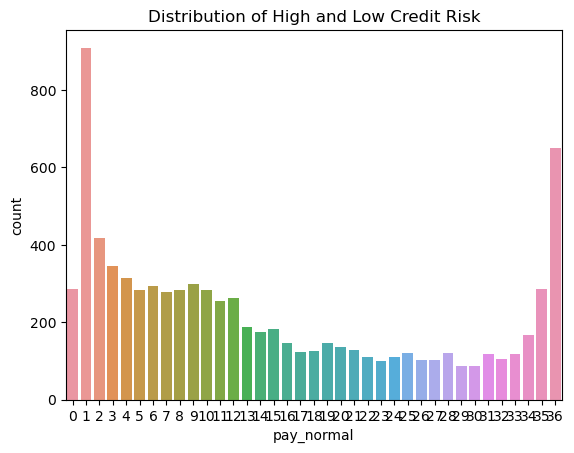

In [10]:
# Explore target variable distribution
target_variable = 'pay_normal'  # Replace with the actual name of your target variable column
sns.countplot(x=target_variable, data=payment_data)
plt.title('Distribution of High and Low Credit Risk')
plt.show()


In [11]:
payment_data['total_overdue_occurrences'] = payment_data['OVD_t1'] + payment_data['OVD_t2'] + payment_data['OVD_t3']


In [12]:
payment_data['avg_overdue_days'] = payment_data['OVD_sum'] / (payment_data['total_overdue_occurrences'] + 1)  # Adding 1 to avoid division by zero


In [13]:
payment_data['payment_ratio'] = payment_data['pay_normal'] / (payment_data['total_overdue_occurrences'] + payment_data['pay_normal'])


In [14]:
payment_data['balance_utilization'] = payment_data['new_balance'] / payment_data['prod_limit']


In [15]:
payment_data['days_since_last_payment'] = (pd.to_datetime(payment_data['report_date']) - pd.to_datetime(payment_data['update_date'])).dt.days


Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


ValueError: time data "31/05/2016" doesn't match format "%m/%d/%Y", at position 31. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [16]:
payment_data['days_since_last_payment'] = (pd.to_datetime(payment_data['report_date'], format='%d/%m/%Y') - pd.to_datetime(payment_data['update_date'], format='%d/%m/%Y')).dt.days


In [19]:
payment_data['days_since_last_payment'] = (pd.to_datetime(payment_data['report_date'], infer_datetime_format=True) - pd.to_datetime(payment_data['update_date'], infer_datetime_format=True)).dt.days


The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


ValueError: time data "31/05/2016" doesn't match format "%m/%d/%Y", at position 31. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [18]:
payment_data['days_since_last_payment'] = (
    pd.to_datetime(payment_data['report_date'], format='%d/%m/%Y', dayfirst=True) -
    pd.to_datetime(payment_data['update_date'], format='%d/%m/%Y', dayfirst=True)
).dt.days


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have loaded and preprocessed your data
# If not, you might need to handle missing values, encode categorical variables, etc.

# Let's create a feature matrix X and target variable y
X = payment_data[['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'prod_limit', 'new_balance', 'highest_balance']]
y = payment_data['pay_normal']  # Assuming 'label' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.1111111111111111
Confusion Matrix:
[[ 0  1  0 ...  0  0  0]
 [ 0  4  1 ...  1  2  4]
 [ 0  0  2 ...  0  0  1]
 ...
 [ 0  1  0 ...  5  1  2]
 [ 0  1  1 ...  0  4  4]
 [ 0  4  1 ...  0  1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.13      0.19      0.16        21
           2       0.12      0.12      0.12        16
           3       0.03      0.12      0.05         8
           4       0.06      0.11      0.07         9
           5       0.00      0.00      0.00        16
           6       0.14      0.09      0.11        11
           7       0.08      0.06      0.07        16
           8       0.14      0.08      0.10        13
           9       0.00      0.00      0.00        15
          10       0.14      0.09      0.11        11
          11       0.00      0.00      0.00        14
          12       0.08      0.08      0.08        13
          13     

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [23]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit and transform the imputer on your feature matrix X
X_imputed = imputer.fit_transform(X)

# Now, use X_imputed in your model training


In [25]:
# Drop rows with missing values
payment_data.dropna(inplace=True)

# Recreate X and y after dropping missing values
X = payment_data[['OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum',  'prod_limit', 'new_balance', 'highest_balance']]
y = payment_data['pay_normal']


In [27]:
feature_importances = model.feature_importances_


In [32]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(model, X, features=[0, 1, 2], grid_resolution=100)


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/Users/isaacxiao/Documents/anaconda3/lib/python3.11/site-packages/sklearn/inspection/__init__.py)

In [29]:
pip install pdpbox


  Obtaining dependency information for pdpbox from https://files.pythonhosted.org/packages/1f/2e/8f115e0c514f2057fd8a99a01f52a5cd7d6952adf98dcffae086c2bccff6/PDPbox-0.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for sphinx-rtd-theme>=1.1.1 from https://files.pythonhosted.org/packages/18/01/76f40a18e9209bb098c1c1313c823dbbd001b23a2db71e7fd4eb5a48559c/sphinx_rtd_theme-1.3.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for xgboost>=1.7.1 from https://files.pythonhosted.org/packages/3e/62/eb702237833c2f49bb7f3a4e6f49807ec213c2539ff8d9bddb2e13aa3690/xgboost-2.0.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 3.3 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 38.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 40.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
from pdpbox import pdp, get_dataset

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X.columns, feature='pay_normal')

# plot it
pdp.pdp_plot(pdp_goals, 'pay_normal')
plt.show()


ImportError: cannot import name 'get_dataset' from 'pdpbox' (/Users/isaacxiao/Documents/anaconda3/lib/python3.11/site-packages/pdpbox/__init__.py)

In [35]:
from pdpbox import pdp

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X.columns, feature='pay_normal')

# Plot the PDP
pdp.pdp_plot(pdp_goals, 'pay_normal')
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

In [36]:
from pdpbox import pdp

# Create the data that we will plot
pdp_goals = pdp.pdp_plot(model=model, dataset=X_test, model_features=X.columns, feature='pay_normal')
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_plot'

In [37]:
from pdpbox import pdp, get_dataset

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X.columns, feature='pay_normal')

# Plot the PDP
pdp.pdp_plot(pdp_goals, 'pay_normal')
plt.show()


ImportError: cannot import name 'get_dataset' from 'pdpbox' (/Users/isaacxiao/Documents/anaconda3/lib/python3.11/site-packages/pdpbox/__init__.py)

In [38]:
from pdpbox import pdp

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X.columns, feature='pay_normal')

# Plot the PDP
pdp.pdp_plot(pdp_goals, 'pay_normal')
plt.show()



AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

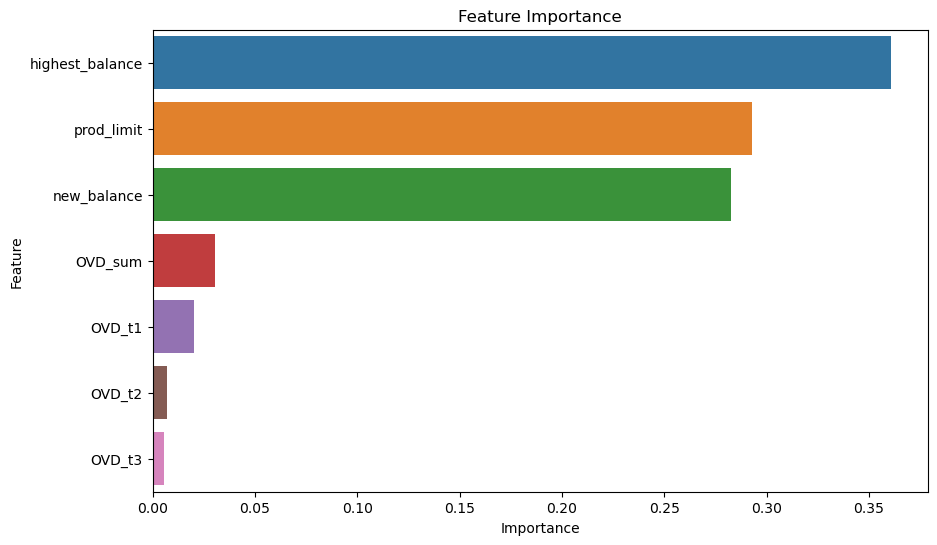

In [39]:
# Access feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [40]:
from pdpbox import pdp

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X.columns, feature='pay_normal')

# Plot the PDP
pdp.pdp_plot(pdp_goals, 'pay_normal')
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

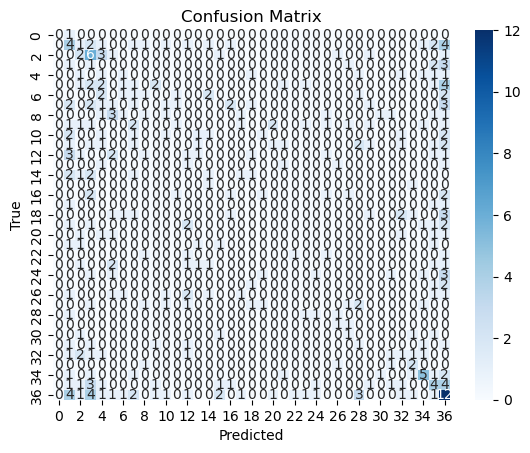

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [42]:
# Display the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.13      0.19      0.16        21
           2       0.12      0.12      0.12        16
           3       0.03      0.12      0.05         8
           4       0.06      0.11      0.07         9
           5       0.00      0.00      0.00        16
           6       0.14      0.09      0.11        11
           7       0.08      0.06      0.07        16
           8       0.14      0.08      0.10        13
           9       0.00      0.00      0.00        15
          10       0.14      0.09      0.11        11
          11       0.00      0.00      0.00        14
          12       0.08      0.08      0.08        13
          13       0.00      0.00      0.00         5
          14       0.12      0.11      0.12         9
          15       0.00      0.00      0.00         2
          16       0.17      0.11      0.13         9
          17       0.00    

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probability of positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


ValueError: multiclass format is not supported

In [44]:
# Create a binary target variable
y_binary = (y_test == 'high risk').astype(int)

# Calculate the probability of the positive class
y_prob_binary = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_binary, y_prob_binary)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_binary, y_prob_binary):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [45]:
from sklearn.metrics import roc_auc_score

# Calculate multiclass ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# Print the multiclass ROC AUC
print(f'Multiclass ROC AUC: {roc_auc:.2f}')


Multiclass ROC AUC: 0.54


In [46]:
# Check the distribution of classes in y_binary
print(y_binary.value_counts())

pay_normal
0    378
Name: count, dtype: int64
